In [30]:
dataset_root = "../dataset/"
images_dir = dataset_root + "complete/"

In [31]:
import sys
import cv2 as cv
import matplotlib.pyplot as plt
sys.path.append("..")

from keras.applications.vgg16 import VGG16, preprocess_input
from feature_extraction import build_feature_extractor
from similarity_search.neural_similarity_search import extract_features

def builder():
    return build_feature_extractor(VGG16, 'fc1')

In [ ]:
batch_size = 128
image_size = (224, 224)

extracted_features, filenames = extract_features(builder, images_dir, batch_size=batch_size, image_size=image_size, rebuild_interval=50, preprocessing=preprocess_input)

In [32]:
import os
import numpy as np
import pandas as pd
extracted_features_root = "./extracted_features/"
extracted_features_path = extracted_features_root + 'vgg16_similarity'
filenames_path = extracted_features_root + 'vgg16_similarity_filenames.csv'

In [33]:
os.makedirs(extracted_features_root, exist_ok=True)
names_df = pd.DataFrame({'filename': filenames})
names_df.to_csv(filenames_path, header=None)
np.save(extracted_features_path, extracted_features)

In [34]:
extracted_features = np.load(extracted_features_path + '.npy')
filenames = pd.read_csv(filenames_path, header=None).iloc[:, 1].values
files = os.listdir(images_dir);

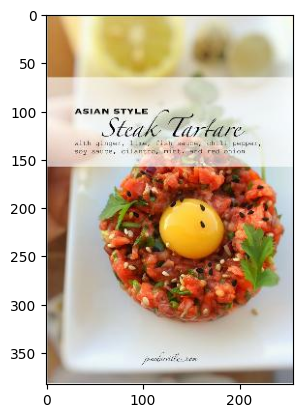

In [37]:
index = np.random.randint(len(files), size=1)[0]
img = cv.imread(images_dir + files[index])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB);

plt.imshow(img)

In [38]:
from similarity_search.neural_similarity_search import find_similar
query_path = images_dir + files[index] 
most_similar_filenames, distances = find_similar(build_feature_extractor(VGG16, 'fc1'), query_path, extracted_features, filenames, preprocess_input)
similar_index = 0

1/1 [==============================] - 0s 211ms/step


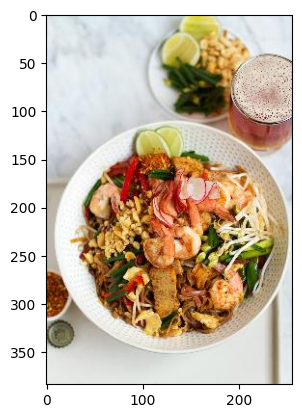

In [44]:
img = cv.imread(images_dir + most_similar_filenames[similar_index])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB);

plt.imshow(img)
similar_index += 1

In [ ]:
import cv2 as cv
cv.destroyAllWindows()
for image_name in most_similar_filenames:
    im = cv.imread(images_dir + image_name)
    cv.imshow(image_name, im)
    cv.waitKey()

In [ ]:
cv.destroyAllWindows()